### Imports

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [72]:
data = pd.read_csv('data/classified_data.csv', sep=',', header=0)
data['created_at'] = pd.to_datetime(data['created_at'])

In [73]:
data.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,text,tb_polarity,tb_subjectivity,hf_label,hf_score
0,2007-03-27 14:27:38+00:00,13633131,NaN,NaN,Weather Extremes,0.752387,believer,male,NaN,not aggressive,USER_REF with global warming you will be able ...,0.242262,0.456548,positive,0.868611
1,2007-04-11 09:27:27+00:00,24477281,-2.716577,51.14804,Seriousness of Gas Emissions,0.135546,believer,male,3.155858,not aggressive,USER_REF - you need a billion dollar project t...,0.000000,0.000000,neutral,0.564668
2,2007-04-26 17:49:51+00:00,40935582,-122.332070,47.60621,Seriousness of Gas Emissions,0.072492,believer,male,-0.245944,aggressive,listening to my eas professor pretend that he ...,0.000000,0.000000,negative,0.589993
3,2007-05-07 13:10:41+00:00,53214992,NaN,NaN,Global stance,-0.485976,believer,male,NaN,not aggressive,an environment agency predicts climate change ...,0.000000,0.000000,neutral,0.679772
4,2007-05-22 16:38:15+00:00,74191762,NaN,NaN,Global stance,-0.180456,neutral,male,NaN,aggressive,"since interest rate is positive, future price ...",0.056818,0.198864,neutral,0.874980


In [74]:
data['topic_code'] = pd.factorize(data['topic'])[0]
data['gender_code'] = pd.factorize(data['gender'])[0]
data['stance_code'] = pd.factorize(data['stance'])[0]
data['aggressiveness_code'] = pd.factorize(data['aggressiveness'])[0]
data['label_code'] = pd.factorize(data['hf_label'])[0]

In [75]:
data.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,text,tb_polarity,tb_subjectivity,hf_label,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
0,2007-03-27 14:27:38+00:00,13633131,NaN,NaN,Weather Extremes,0.752387,believer,male,NaN,not aggressive,USER_REF with global warming you will be able ...,0.242262,0.456548,positive,0.868611,0,0,0,0,0
1,2007-04-11 09:27:27+00:00,24477281,-2.716577,51.14804,Seriousness of Gas Emissions,0.135546,believer,male,3.155858,not aggressive,USER_REF - you need a billion dollar project t...,0.000000,0.000000,neutral,0.564668,1,0,0,0,1
2,2007-04-26 17:49:51+00:00,40935582,-122.332070,47.60621,Seriousness of Gas Emissions,0.072492,believer,male,-0.245944,aggressive,listening to my eas professor pretend that he ...,0.000000,0.000000,negative,0.589993,1,0,0,1,2
3,2007-05-07 13:10:41+00:00,53214992,NaN,NaN,Global stance,-0.485976,believer,male,NaN,not aggressive,an environment agency predicts climate change ...,0.000000,0.000000,neutral,0.679772,2,0,0,0,1
4,2007-05-22 16:38:15+00:00,74191762,NaN,NaN,Global stance,-0.180456,neutral,male,NaN,aggressive,"since interest rate is positive, future price ...",0.056818,0.198864,neutral,0.874980,2,0,1,1,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68283 entries, 0 to 68282
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   created_at           68283 non-null  datetime64[ns, UTC]
 1   id                   68283 non-null  int64              
 2   lng                  24797 non-null  float64            
 3   lat                  24797 non-null  float64            
 4   topic                68283 non-null  object             
 5   sentiment            68283 non-null  float64            
 6   stance               68283 non-null  object             
 7   gender               68283 non-null  object             
 8   temperature_avg      24797 non-null  float64            
 9   aggressiveness       68283 non-null  object             
 10  text                 68283 non-null  object             
 11  tb_polarity          68283 non-null  float64            
 12  tb_subjectivity   

In [77]:
data.corr()

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
id,1.000000,0.053515,0.002062,0.072136,0.137895,0.040647,0.080491,0.029377,0.129992,0.019574,-0.207586,-0.057390,-0.016528
lng,0.053515,1.000000,-0.607683,0.055694,-0.006862,0.017822,-0.008507,0.000322,0.047151,0.037178,-0.069261,-0.068381,-0.036820
lat,0.002062,-0.607683,1.000000,0.001668,0.132806,-0.005693,0.003729,0.006144,0.011365,-0.024020,0.003294,0.020484,-0.021467
sentiment,0.072136,0.055694,0.001668,1.000000,0.027654,0.378311,-0.002939,0.006041,0.094196,0.016097,-0.142988,-0.137559,-0.524086
temperature_avg,0.137895,-0.006862,0.132806,0.027654,1.000000,0.022798,0.003472,0.011176,0.032752,0.008372,-0.056031,-0.012517,-0.020068
tb_polarity,0.040647,0.017822,-0.005693,0.378311,0.022798,1.000000,0.109340,-0.058511,0.021792,0.010677,-0.030818,-0.033342,-0.274968
tb_subjectivity,0.080491,-0.008507,0.003729,-0.002939,0.003472,0.109340,1.000000,0.004658,-0.033802,0.011642,-0.046709,-0.024806,0.010152
hf_score,0.029377,0.000322,0.006144,0.006041,0.011176,-0.058511,0.004658,1.000000,0.001419,0.008846,0.001735,-0.002136,-0.012719
topic_code,0.129992,0.047151,0.011365,0.094196,0.032752,0.021792,-0.033802,0.001419,1.000000,-0.002034,-0.150462,0.023696,-0.085156
gender_code,0.019574,0.037178,-0.024020,0.016097,0.008372,0.010677,0.011642,0.008846,-0.002034,1.000000,-0.036285,-0.016068,-0.003248


In [78]:
data.describe()

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
count,6.828300e+04,24797.000000,24797.000000,68283.000000,24797.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000
mean,8.063511e+17,-43.507358,34.138373,-0.026242,1.204358,0.045078,0.297883,0.729627,3.007205,0.337170,0.284903,0.262642,1.288857
std,3.268015e+17,76.813557,23.332296,0.426249,3.771311,0.226309,0.276791,0.137312,2.499572,0.529805,0.581506,0.440073,0.649723
min,1.363313e+07,-161.755833,-76.050000,-0.978728,-18.063744,-1.000000,0.000000,0.338455,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.757466e+17,-94.250550,33.749000,-0.404520,-1.184536,0.000000,0.000000,0.613759,1.000000,0.000000,0.000000,0.000000,1.000000
50%,9.439078e+17,-76.610759,40.349274,-0.037812,1.177470,0.000000,0.262500,0.738494,2.000000,0.000000,0.000000,0.000000,1.000000
75%,1.037260e+18,-0.127647,47.166670,0.367817,3.858516,0.136364,0.500000,0.848753,4.000000,1.000000,0.000000,1.000000,2.000000
max,1.178898e+18,178.442166,79.994720,0.976721,17.907597,1.000000,1.000000,0.991963,9.000000,2.000000,2.000000,1.000000,2.000000


#### correlation plots

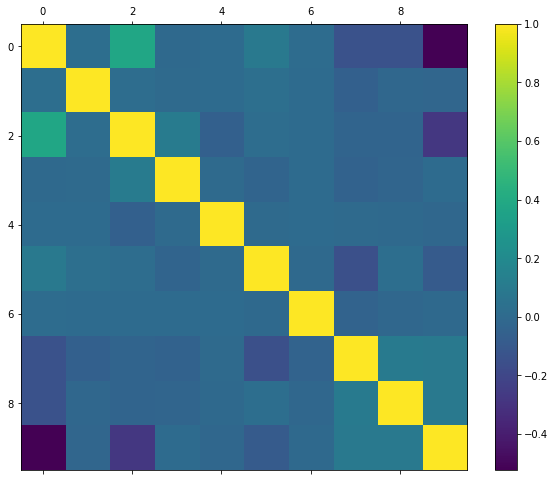

In [79]:
f = plt.figure(figsize=(10, 8))
plt.matshow(data.drop(['id', 'lng', 'lat'], axis=1).corr(), fignum=f.number)
plt.colorbar()

<AxesSubplot:>

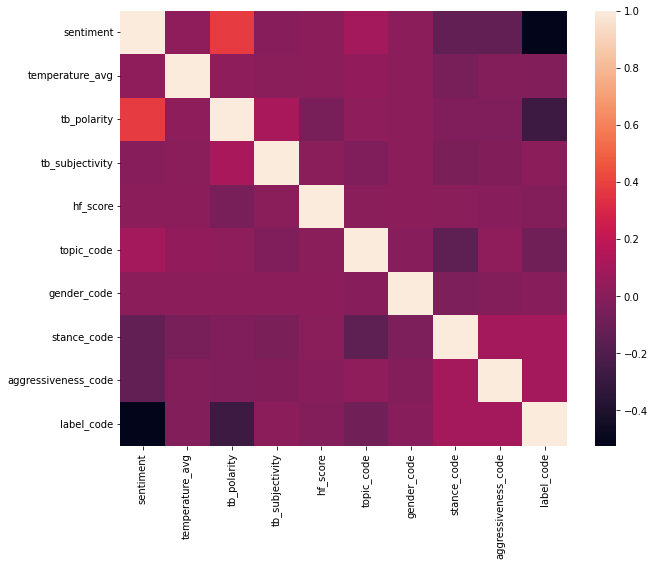

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['id', 'lng', 'lat'], axis=1).corr()
sns.heatmap(corr, ax=ax)

### gender stats
as one can see, there are no noticeable differences for the value distributions throughout the gender

<AxesSubplot:xlabel='gender', ylabel='sentiment'>

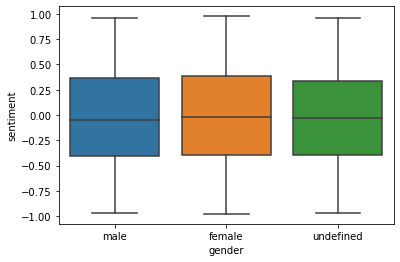

In [81]:
sns.boxplot(x='gender', y='sentiment', data=data)

<AxesSubplot:xlabel='gender', ylabel='temperature_avg'>

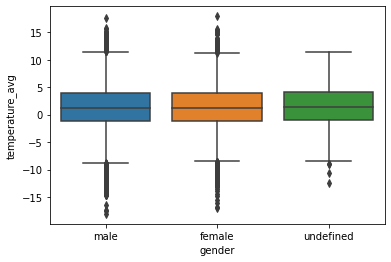

In [82]:
sns.boxplot(x='gender', y='temperature_avg', data=data)

<AxesSubplot:xlabel='gender', ylabel='tb_polarity'>

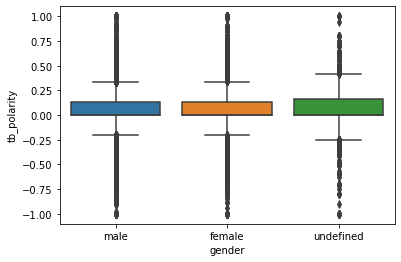

In [83]:
sns.boxplot(x='gender', y='tb_polarity', data=data)

<AxesSubplot:xlabel='gender', ylabel='tb_subjectivity'>

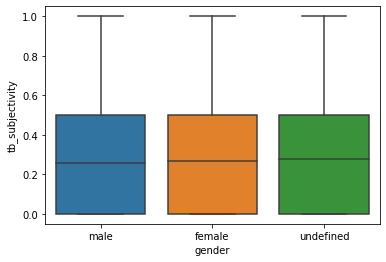

In [84]:
sns.boxplot(x='gender', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='gender', ylabel='hf_score'>

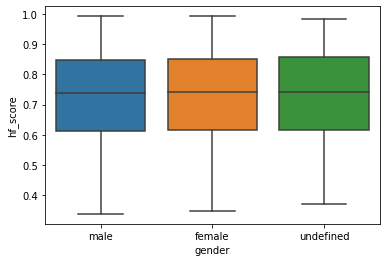

In [85]:
sns.boxplot(x='gender', y='hf_score', data=data)

### topic stats
here the values seem to vary a bit from topic to topic

<AxesSubplot:xlabel='topic', ylabel='sentiment'>

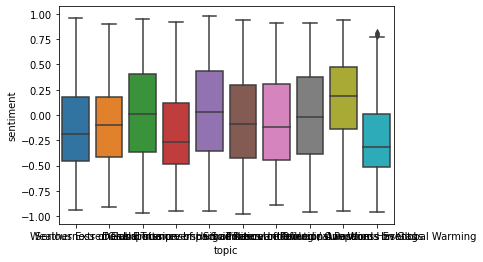

In [86]:
sns.boxplot(x='topic', y='sentiment', data=data)

<AxesSubplot:xlabel='topic', ylabel='temperature_avg'>

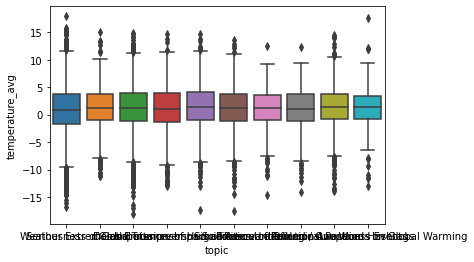

In [87]:
sns.boxplot(x='topic', y='temperature_avg', data=data)

<AxesSubplot:xlabel='topic', ylabel='tb_polarity'>

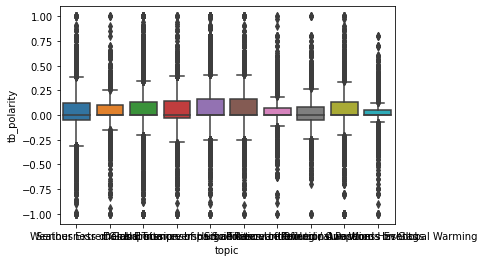

In [88]:
sns.boxplot(x='topic', y='tb_polarity', data=data)

<AxesSubplot:xlabel='topic', ylabel='tb_subjectivity'>

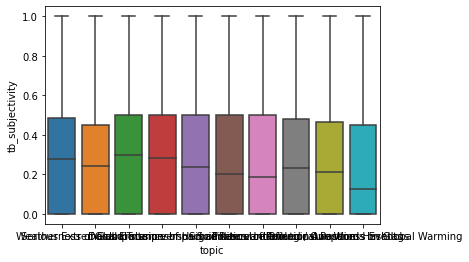

In [89]:
sns.boxplot(x='topic', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='topic', ylabel='hf_score'>

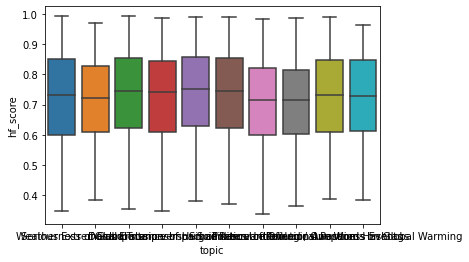

In [90]:
sns.boxplot(x='topic', y='hf_score', data=data)

### stance stats
in the case of the sentiment a difference between the stance can be seen

<AxesSubplot:xlabel='stance', ylabel='sentiment'>

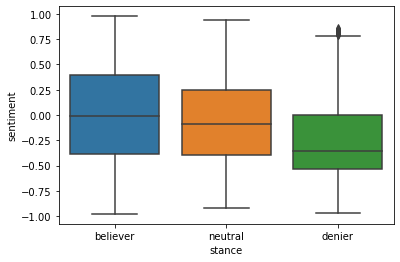

In [91]:
sns.boxplot(x='stance', y='sentiment', data=data)

<AxesSubplot:xlabel='stance', ylabel='temperature_avg'>

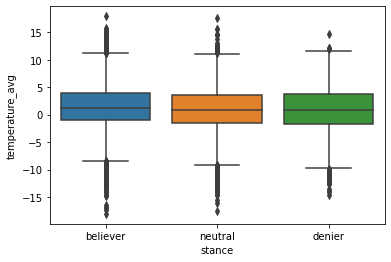

In [92]:
sns.boxplot(x='stance', y='temperature_avg', data=data)

<AxesSubplot:xlabel='stance', ylabel='tb_polarity'>

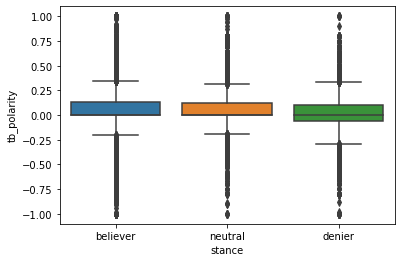

In [93]:
sns.boxplot(x='stance', y='tb_polarity', data=data)

<AxesSubplot:xlabel='stance', ylabel='tb_subjectivity'>

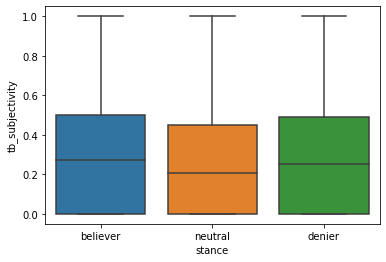

In [94]:
sns.boxplot(x='stance', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='stance', ylabel='hf_score'>

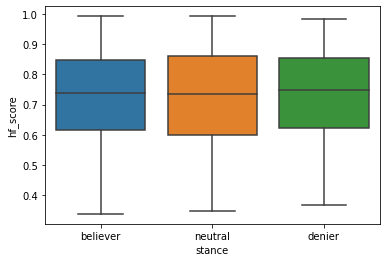

In [95]:
sns.boxplot(x='stance', y='hf_score', data=data)

### stats over time

#### monthly

In [104]:
data_month = data.copy()
data_month.index = data_month['created_at']
data_month = data_month.groupby(pd.Grouper(freq='M')).mean()

data_month.head(10)

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
created_at,,,,,,,,,,,,,
2007-03-31 00:00:00+00:00,1.363313e+07,NaN,NaN,0.752387,NaN,0.242262,0.456548,0.868611,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-30 00:00:00+00:00,3.270643e+07,-62.524324,49.377125,0.104019,1.454957,0.000000,0.000000,0.577330,1.000000,0.000000,0.000000,0.500000,1.500000
2007-05-31 00:00:00+00:00,6.370338e+07,NaN,NaN,-0.333216,NaN,0.028409,0.099432,0.777376,2.000000,0.000000,0.500000,0.500000,1.000000
2007-06-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-31 00:00:00+00:00,1.436029e+08,-83.000706,39.962260,0.383471,1.807294,0.020833,0.166667,0.578794,2.000000,0.000000,0.000000,0.000000,1.000000
2007-08-31 00:00:00+00:00,1.891948e+08,-117.928950,33.618910,-0.027669,0.299003,-0.008333,0.450000,0.736163,1.500000,0.500000,0.000000,0.500000,1.000000
2007-09-30 00:00:00+00:00,2.900882e+08,NaN,NaN,-0.171306,NaN,-0.016667,0.361111,0.828587,1.333333,0.333333,1.000000,0.333333,1.333333
2007-10-31 00:00:00+00:00,3.380847e+08,-86.774353,36.162230,0.247069,3.778611,0.450000,0.200000,0.677831,3.000000,0.000000,0.000000,0.000000,1.000000
2007-11-30 00:00:00+00:00,4.354933e+08,-0.127647,51.507322,-0.315580,2.474399,-0.003125,0.084375,0.729882,1.750000,0.000000,0.500000,0.250000,1.500000


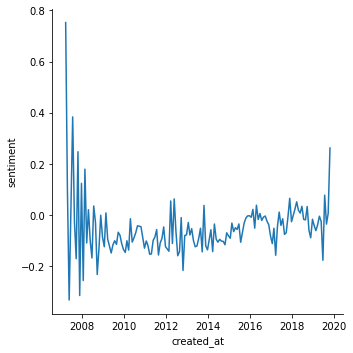

In [98]:
sns.relplot(x='created_at', y='sentiment', data=data_month, kind='line')

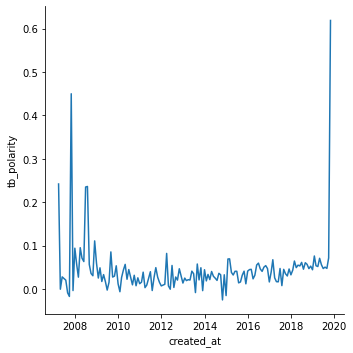

In [100]:
sns.relplot(x='created_at', y='tb_polarity', data=data_month, kind='line')

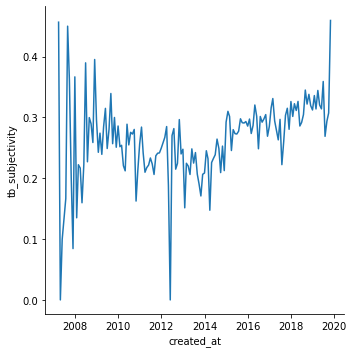

In [101]:
sns.relplot(x='created_at', y='tb_subjectivity', data=data_month, kind='line')

#### weekly

In [103]:
data_week = data.copy()
data_week.index = data_week['created_at']
data_week = data_week.groupby(pd.Grouper(freq='W')).mean()

data_week.head(10)

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
created_at,,,,,,,,,,,,,
2007-04-01 00:00:00+00:00,13633131.0,NaN,NaN,0.752387,NaN,0.242262,0.456548,0.868611,0.0,0.0,0.0,0.0,0.0
2007-04-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-15 00:00:00+00:00,24477281.0,-2.716577,51.14804,0.135546,3.155858,0.000000,0.000000,0.564668,1.0,0.0,0.0,0.0,1.0
2007-04-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-29 00:00:00+00:00,40935582.0,-122.332070,47.60621,0.072492,-0.245944,0.000000,0.000000,0.589993,1.0,0.0,0.0,1.0,2.0
2007-05-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-13 00:00:00+00:00,53214992.0,NaN,NaN,-0.485976,NaN,0.000000,0.000000,0.679772,2.0,0.0,0.0,0.0,1.0
2007-05-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-27 00:00:00+00:00,74191762.0,NaN,NaN,-0.180456,NaN,0.056818,0.198864,0.874980,2.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='created_at', ylabel='sentiment'>

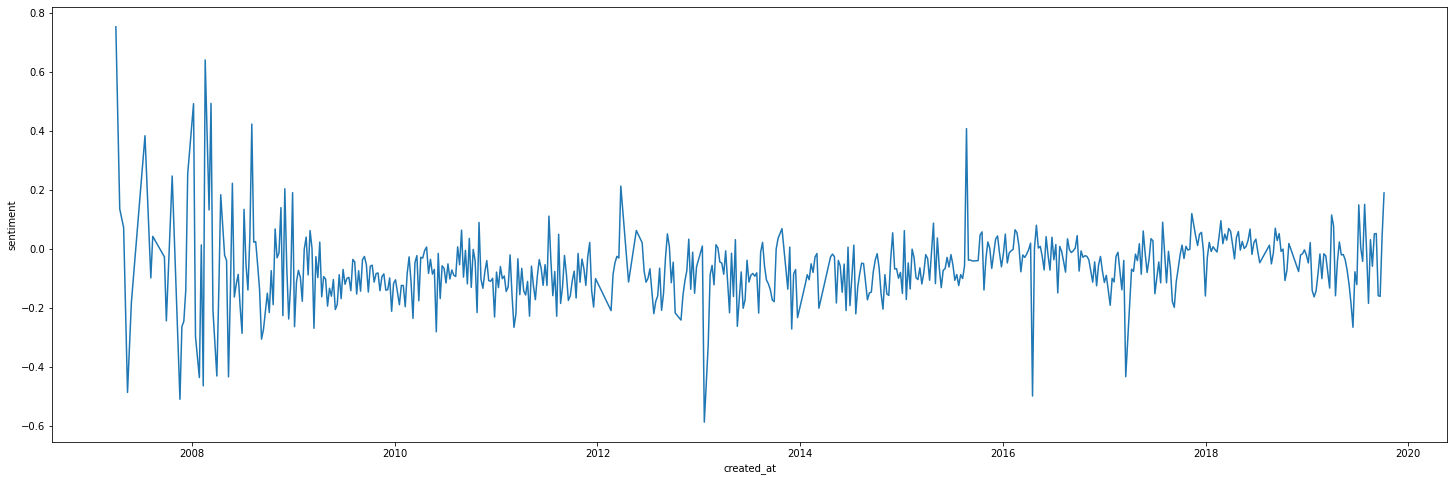

In [116]:
fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(x='created_at', y='sentiment', data=data_week, ax=ax)

<AxesSubplot:xlabel='created_at', ylabel='tb_polarity'>

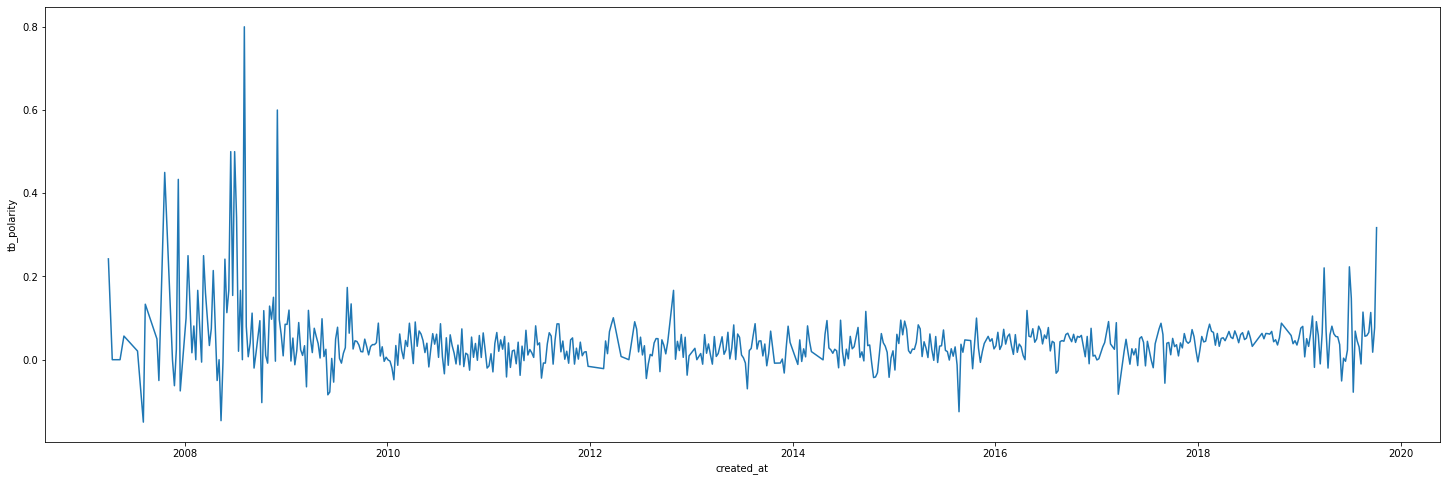

In [117]:
fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(x='created_at', y='tb_polarity', data=data_week, ax=ax)

<AxesSubplot:xlabel='created_at', ylabel='tb_subjectivity'>

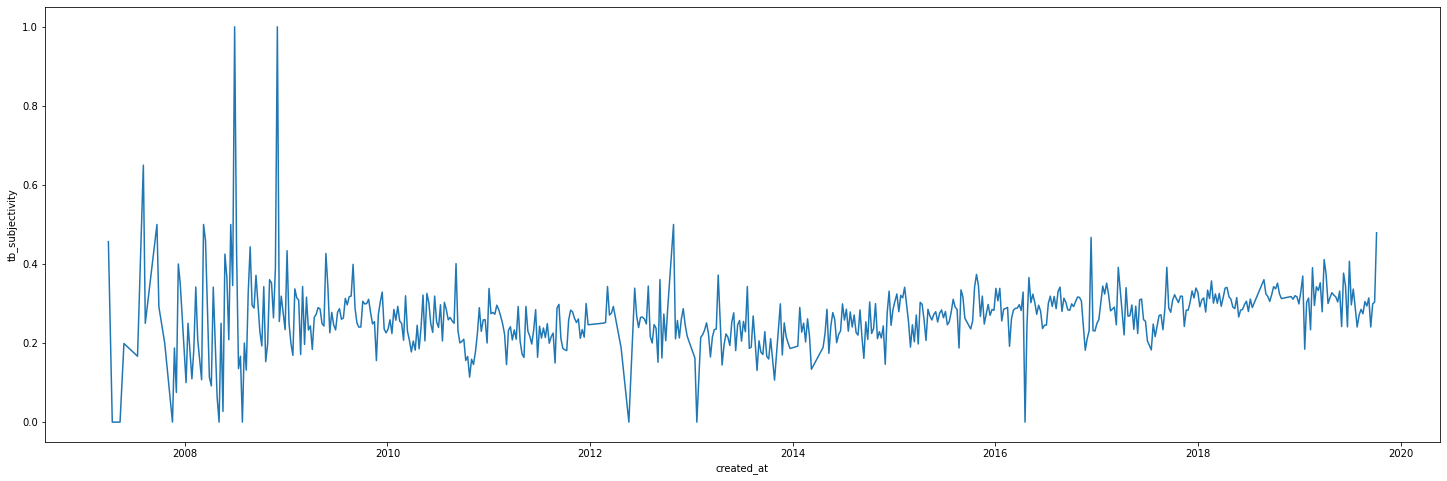

In [118]:
fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(x='created_at', y='tb_subjectivity', data=data_week, ax=ax)